In [1]:
set.seed(123)     
library(glmnet)   
library(dplyr)  
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



Call:
lm(formula = y3 ~ x1 + x2 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.80201 -0.47208  0.03824  0.71808  2.08664 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4851     1.4539  -1.021  0.32437    
x1            1.2931     0.4073   3.175  0.00675 ** 
x2            1.3509     0.4073   3.317  0.00509 ** 
x3            0.9494     0.1046   9.078 3.05e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.251 on 14 degrees of freedom
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9911 
F-statistic: 634.4 on 3 and 14 DF,  p-value: 3.466e-15



Call:
lm(formula = y3 ~ x1 + x2 + x3 + x4)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.82616 -0.50083 -0.02242  0.81191  1.82574 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.41877    1.49943  -0.946  0.36130   
x1           1.27419    0.42009   3.033  0.00961 **
x2           1.17388    0.54266   2.163  0.04974 * 
x3           1.06947    0.25781   4.148  0.00114 **
x4          -0.01614    0.03150  -0.512  0.61701   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.285 on 13 degrees of freedom
Multiple R-squared:  0.9928,	Adjusted R-squared:  0.9906 
F-statistic: 450.8 on 4 and 13 DF,  p-value: 8.477e-14


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

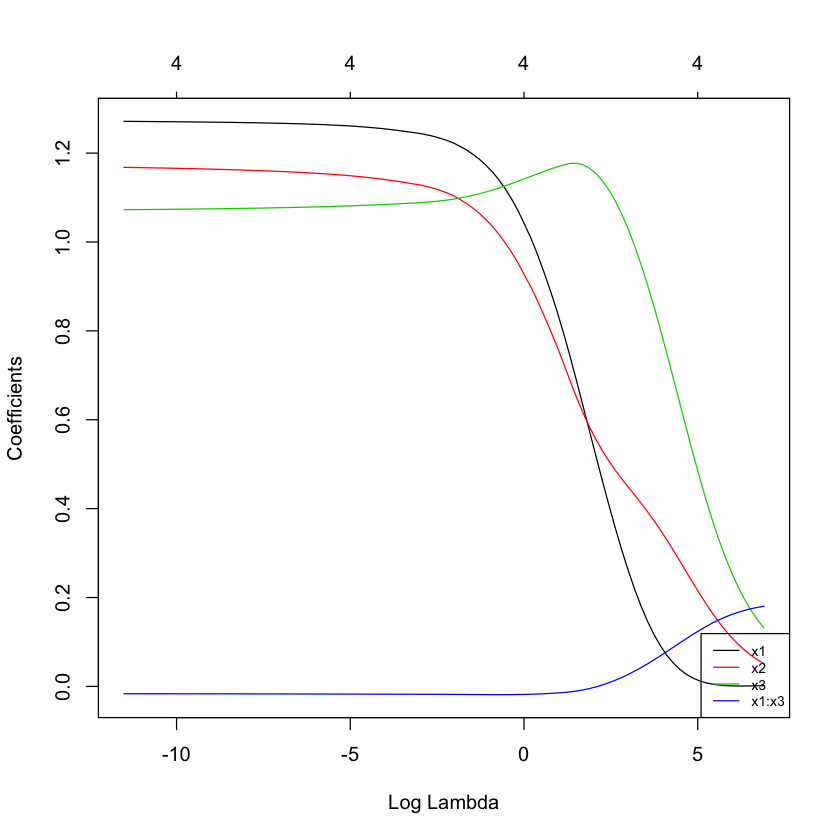

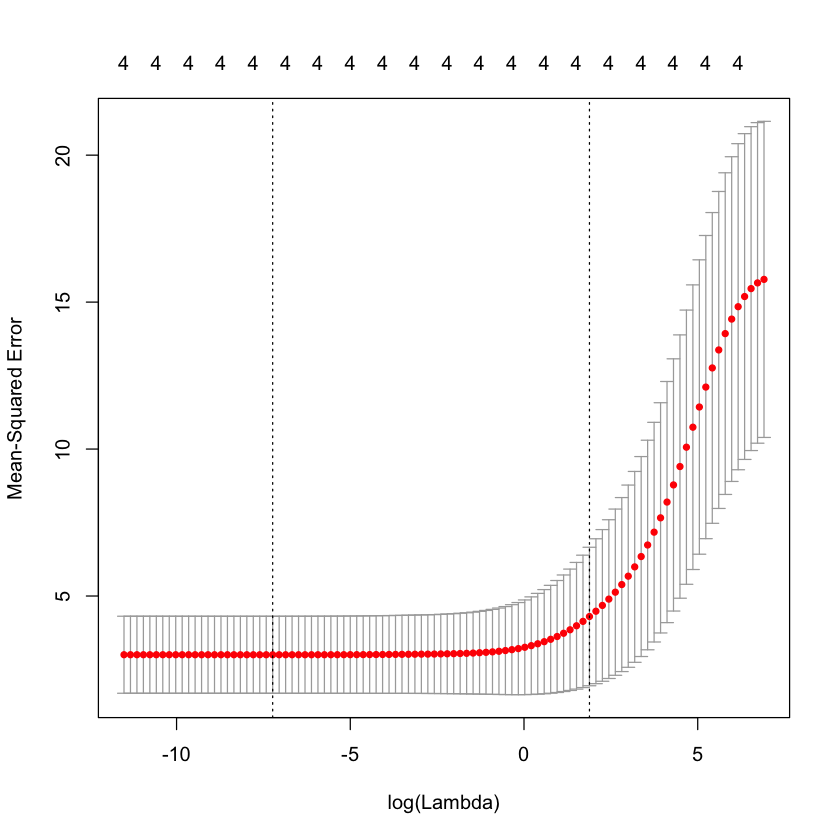

In [8]:
set.seed(123)
x1=rep(1:6,3)
x2=rep(1:6,each=3)
x3=x1*x2
x4=1*x1*x3
y1=x1+x2+rnorm(18)
y2=x3+rnorm(18)
y3=y1+y2

my.fit=lm( y3 ~ x1 + x2 + x3 )
summary(my.fit)

my.fit=lm( y3 ~ x1 + x2 + x3 + x4)
summary(my.fit)

Xall <- cbind(x1,x2,x3,x1*x3)#,x2*x3,x1*x2*x3)
colnamestouse <- c("x1","x2","x3","x1:x3")#,"x2:x3","x1:x2:x3")
colnames(Xall) <- colnamestouse
  
# Sweep lambda from 10^-5 to 10^5 in 100 steps
lambdas_to_try <- 10^seq(-5,3, length.out = 100) 
  
# plot the coefficients
reg_fit <- glmnet(Xall, y3, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE) 

plot(reg_fit, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6,  
       legend = colnames(Xall), cex = .7)

# Setting alpha = 0 implements ridge regression 
ridge_cv <- cv.glmnet(Xall, y3, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE, nfolds = 10) 
  
# Plot cross-validation results 
plot(ridge_cv) 


Call:
lm(formula = y3 ~ x1 + x2 + x3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.280201 -0.047208  0.003824  0.071808  0.208664 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.14851    0.14539  -1.021    0.324    
x1           1.02931    0.04073  25.272 4.42e-13 ***
x2           1.03509    0.04073  25.414 4.09e-13 ***
x3           0.99494    0.01046  95.135  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1251 on 14 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 6.035e+04 on 3 and 14 DF,  p-value: < 2.2e-16



Call:
lm(formula = y3 ~ x1 + x2 + x3 + x1:x3 + x2:x3 + x1:x2:x3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.179393 -0.040053 -0.005516  0.055505  0.139321 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.161960   0.151923   1.066  0.30923    
x1           0.976864   0.058500  16.699 3.67e-09 ***
x2           0.961167   0.045784  20.993 3.18e-10 ***
x3           0.887206   0.042264  20.992 3.18e-10 ***
x1:x3        0.022539   0.007162   3.147  0.00929 ** 
x2:x3        0.025864   0.007269   3.558  0.00449 ** 
x1:x2:x3    -0.004840   0.001359  -3.561  0.00446 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09423 on 11 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:  0.9999 
F-statistic: 5.316e+04 on 6 and 11 DF,  p-value: < 2.2e-16


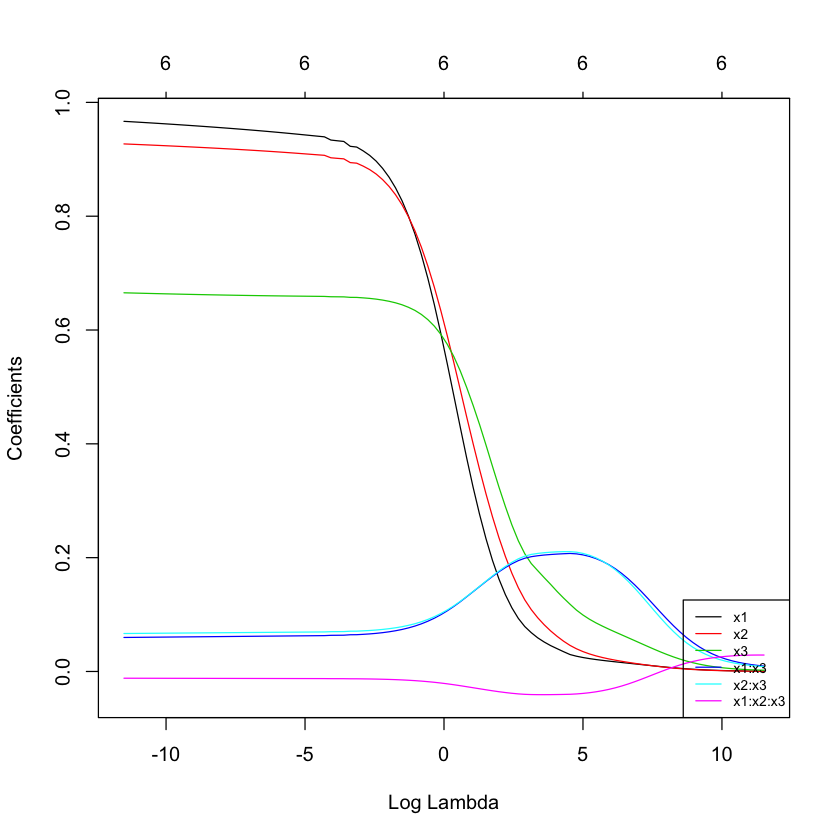

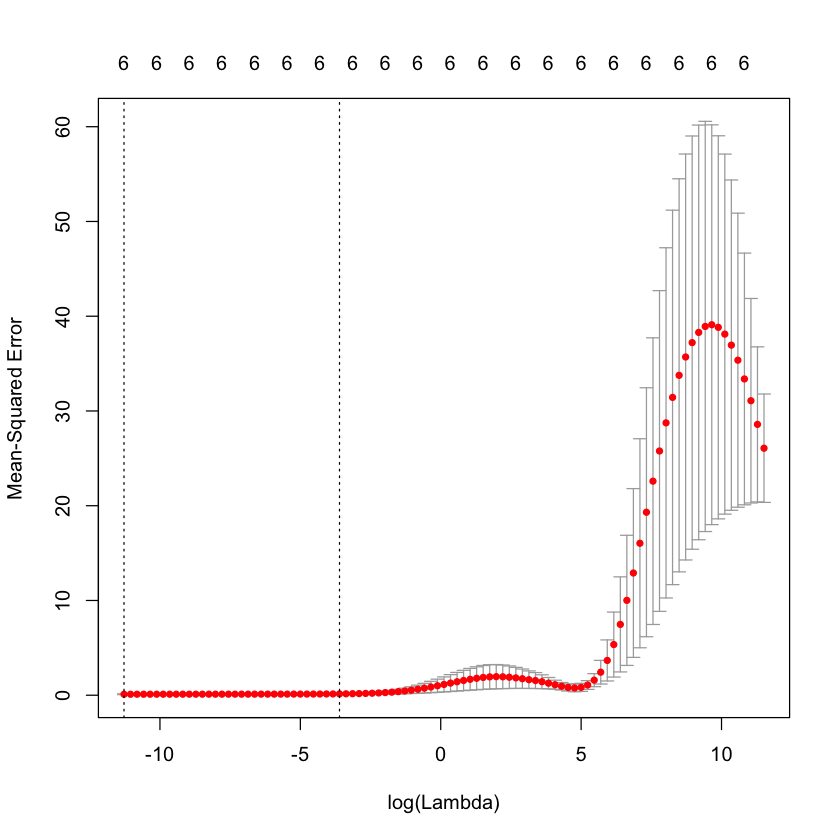

In [11]:
set.seed(123)
x1=rep(1:6,3)
x2=rep(1:6,each=3)
x3=x1*x2
y1=x1+x2+.1*rnorm(18)
y2=x3+.1*rnorm(18)
y3=y1+y2

my.fit=lm( y3 ~ x1 + x2 + x3 )
summary(my.fit)

my.fit=lm( y3 ~ x1 + x2 + x3 + x1:x3 + x2:x3 + x1:x2:x3)
summary(my.fit)

Xall <- cbind(x1,x2,x3,x1*x3,x2*x3,x1*x2*x3)
colnamestouse <- c("x1","x2","x3","x1:x3","x2:x3","x1:x2:x3")#,"x2:x3","x1:x2:x3")
colnames(Xall) <- colnamestouse
  
# Perform 10-fold cross-validation to select lambda 
lambdas_to_try <- 10^seq(-5,5, length.out = 100) 
  
# plot the coefficients
ridge_cv <- glmnet(Xall, y3, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE) 

plot(ridge_cv, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6,  
       legend = colnames(Xall), cex = .7)

# Setting alpha = 0 implements ridge regression 
ridge_cv <- cv.glmnet(Xall, y3, alpha = 0,  
                      lambda = lambdas_to_try, 
                      standardize = FALSE, nfolds = 5) 
  
# Plot cross-validation results 
plot(ridge_cv) 